In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/config.json
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/tokenizer.json
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/metadata.json
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/model.weights.h5
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/assets/tokenizer/vocabulary.spm
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')

In [4]:
df.iloc[0,:]

essay_id                                               000d118
full_text    Many people have car where they live. The thin...
score                                                        3
Name: 0, dtype: object

In [6]:
s = df[df['score']==6]


In [7]:
s.iloc[0,1]

'Dear, Senator\n\nThe\n\nElectoral college has been around for centuries and as time changes, things start to evolve and grow along with the time period.\n\nSome things are meant to be changed according to the lifestyle of our people now. Hundreds of years back, the electoral college might have worked for the citizens living during that time. However, this is a new century and many people agree with the fact that the electoral college is out dated and we need to change to the election by popular vote. Firstly, because the people are putting their vote into the hands of a person whom they might not even consider the votes of their state\'s people . Also, the electoral college causes many issues duing the voting period.\n\nTo start off, The electoral college is a huge risk that the state\'s people must take each year.\n\nYou never know whether or not your electors will suddenly change their mind and vote for a candidate that you personally didn\'t want. In the article "The indefensible e

In [8]:
import matplotlib.pyplot as plt

## Distribution of score

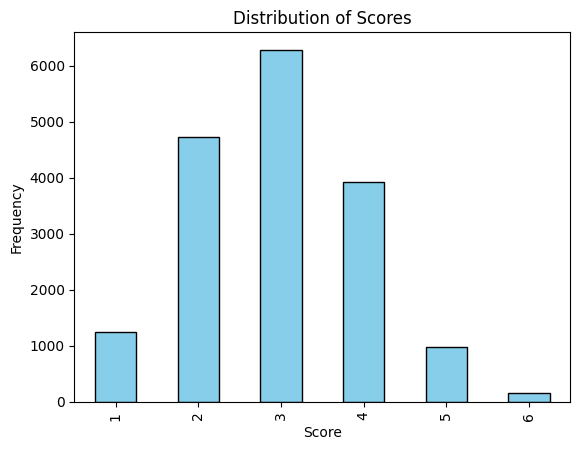

In [9]:
score_distribution = df['score'].value_counts().sort_index()

# Plot the distribution using a bar chart
score_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [13]:
score_distribution

score
1    1252
2    4723
3    6280
4    3926
5     970
6     156
Name: count, dtype: int64

# Preprocessing

In [47]:
CONTRACTION_PATTERNS = [
    (r"won't", "will not"),
    (r"can't", "can not"),
    (r"n't", " not"),
    (r"'re", " are"),
    (r"'s", " is"),
    (r"'d", " would"),
    (r"'ll", " will"),
    (r"'t", " not"),
    (r"'ve", " have"),
    (r"'m", " am"),
]

@tf.function
def expand_contractions(text):
    for pattern, replacement in CONTRACTION_PATTERNS:
        pattern_tensor = tf.constant(pattern)
        replacement_tensor = tf.constant(replacement)
        text = tf.strings.regex_replace(text, pattern, replacement, replace_global=True)
    return text

In [12]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.1 MB/s eta 0:00:0000:0100:01


In [204]:
from spellchecker import SpellChecker

spell = SpellChecker() 
def correct_spelling(text):
    # Tokenize the text
    tokens = text.split()

    # Correct spelling for each token
    corrected_tokens = [spell.correction(token) for token in tokens]

    # Join the corrected tokens back into a single text
    corrected_text = ' '.join(corrected_tokens)

    return corrected_text

In [205]:
one_score = df[df['score']==1]

In [210]:
one_score.iloc[0,1]

"''The Challenge of Exploring Venus'' is a informative text, Venus called the ''Evening Star''is one of the brightest point of light in the night sky,In the solar systen Venus is the secont from our sun; Earth's twin Venus is teh close planet to Earth, and occasionally the closest in distance too Earth, Venus, and Mars.\n\nFirst, Venus is a hot planet, Venus has somre persent of carbon dioxide,Venus is so closer to the sumfor that reason Venus has the hottest surface temperature of any planet in iur solar system. The temoperature is the over 800 degrees fahrenheit, and the atmosphere presure is 90 times greater than what we experience on our own planet, people can't survive.\n\nSecondly, The scientifict However, peering at Venus from a ship orbiting or hovering safely far above the planet can povide only limited insight on ground conditions because about However the light cannot penetrate th eatmosphere and it's from photography an dvideography ineffective.\n\nLastly, The NASA is worki

In [209]:
correct_spelling("")

TypeError: sequence item 67: expected str instance, NoneType found

In [24]:
word2vec_model = hub.load("https://tfhub.dev/google/Wiki-words-500/2")

In [87]:
# from nltk.corpus import stopwords

# stop_words = set(stopwords.words('english'))

# # Convert stop words set to a lookup table
# stop_words_table = tf.lookup.StaticVocabularyTable(
#     initializer=tf.lookup.KeyValueTensorInitializer(
#         keys=tf.constant(list(stop_words)),
#         values=tf.constant(list(range(len(stop_words))), dtype=tf.int64),
#     ),
#     num_oov_buckets=1
# )

In [82]:
stop_words


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [158]:
max_length=30

In [116]:
# @tf.function
# def pad_or_truncate_strings(tokens, max_length, pad_value=' '):
#     """
#     Pad or truncate a list of strings to a fixed length.
#     """
#     padded_chars = tf.map_fn(
#         lambda x: tf.concat([x, pad_value * tf.maximum(0, max_length - tf.size(x))], 0)[:max_length],
#         tokens,
#         fn_output_signature=tf.RaggedTensorSpec(None, tf.string, ragged_rank=0)
#     )
#     padded_strings = tf.strings.join(padded_chars.flat_values)
#     return padded_strings

In [211]:
import re

import tensorflow_hub as hub
import tensorflow_text as tf_text
import tensorflow as tf


def preprocess_essay(text,label):
    # Text cleaning
    text = tf.expand_dims(text, axis=0)
    text = tf.strings.regex_replace(text, r'<[^>]+>', '') # Remove HTML tags
    text = tf.strings.regex_replace(text, r'\n', ' ') # Replace newlines with spaces
    text = tf.strings.regex_replace(text, r'http\S+', '') # Remove URL
    text = tf.strings.regex_replace(text, r'\S+@\S+', '') # Remove email addresses
    
    text = expand_contractions(text)
    
    special_characters = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    
    text = tf.strings.regex_replace(text, f"[{re.escape(special_characters)}]", "") # Remove unwanted characters
    
    # Tokenization
    tokens = tf_text.WhitespaceTokenizer().tokenize(text)
    
    sos_tensor = tf.expand_dims(tf.constant(['<sos>']), axis=0)
    eos_tensor = tf.expand_dims(tf.constant(['<eos>']), axis=0)
    tokens = tf.concat([sos_tensor, tokens, eos_tensor], axis=1)  # Add start-of-sentence and end-of-sentence tokens
    
    # Case normalization
    tokens = tf.strings.lower(tokens)
    
    tokens_length = tf.size(tokens, out_type=tf.int32)

    padded_tokens = tf.cond(
        tokens_length < max_length,
        lambda: tf.concat([tokens, tf.fill([1, max_length - tokens_length], '<pad>')], axis=1),
        lambda: tokens[:, :max_length]
    )
    
    padded_tokens_dense = tf.reshape(padded_tokens.to_tensor(), shape=[-1])
    
    # Text normalization
    embeddings = tf_text.normalize_utf8(
    padded_tokens_dense, normalization_form='NFC', name=None)
    print(embeddings)
    # Convert tokens to word embeddings
    embeddings = word2vec_model(embeddings)
  

    return embeddings,label

In [203]:
preprocess_essay(tf.constant("This isn't a sample text 株式会社 Anuther example with misspelled words."),tf.constant(2))

tf.Tensor(
[b'<sos>' b'this' b'is' b'not' b'a' b'sample' b'text'
 b'\xe6\xa0\xaa\xe5\xbc\x8f\xe4\xbc\x9a\xe7\xa4\xbe' b'anuther' b'example'
 b'with' b'misspelled' b'words' b'<eos>' b'<pad>' b'<pad>' b'<pad>'
 b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>'
 b'<pad>' b'<pad>' b'<pad>' b'<pad>' b'<pad>'], shape=(30,), dtype=string)


(<tf.Tensor: shape=(30, 500), dtype=float32, numpy=
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.05266737, -0.01471785,  0.06071551, ...,  0.020022  ,
          0.1216859 ,  0.05867179],
        [ 0.00137178, -0.06974217,  0.03241544, ...,  0.02436278,
          0.04049175,  0.05069738],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

In [215]:
score_tensor = tf.constant(df['score'].values)
essay_tensor = tf.constant(df['full_text'].values)

In [216]:
dataset = tf.data.Dataset.from_tensor_slices((essay_tensor, score_tensor))


In [217]:
dataset = dataset.map(preprocess_essay,num_parallel_calls=tf.data.AUTOTUNE)

Tensor("NormalizeUTF8/NormalizeUTF8:0", shape=(None,), dtype=string)


In [218]:
dataset

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [219]:
# Determine the total size and split ratios
total_size = len(df['score'].values)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=500, reshuffle_each_iteration=False)

# Split the dataset into training, validation, and test sets
train_data = dataset.take(train_size)
remaining_data = dataset.skip(train_size)
val_data = remaining_data.take(val_size)
test_data = remaining_data.skip(val_size)

In [220]:
train_data        

<_TakeDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# Using  DeBERTa

In [4]:
df.iloc[1,:]

essay_id                                               000fe60
full_text    I am a scientist at NASA that is discussing th...
score                                                        3
Name: 1, dtype: object

In [95]:
import keras_nlp
import keras
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

In [96]:
os.environ["KERAS_BACKEND"] = "tensorflow"

In [97]:
#score_tensor = tf.constant(df['score'].values)
essay_tensor = tf.constant(df['full_text'].values)

In [65]:
# label_mapping = {
#     1: [1, 0, 0, 0, 0, 0],
#     2: [0, 1, 0, 0, 0, 0],
#     3: [0, 0, 1, 0, 0, 0],
#     4: [0, 0, 0, 1, 0, 0],
#     5: [0, 0, 0, 0, 1, 0],
#     6: [0, 0, 0, 0, 0, 1]
# }

In [66]:
# labels_one_hot = tf.constant([label_mapping[label] for label in df['score'].values])

In [67]:
# labels_one_hot

<tf.Tensor: shape=(17307, 6), dtype=int32, numpy=
array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int32)>

In [98]:
def to_ordinal(y, num_classes=None, dtype="float32"):
    """Converts a class vector (integers) to an ordinal regression matrix.

    This utility encodes class vector to ordinal regression/classification
    matrix where each sample is indicated by a row and rank of that sample is
    indicated by number of ones in that row.

    Args:
        y: Array-like with class values to be converted into a matrix
            (integers from 0 to `num_classes - 1`).
        num_classes: Total number of classes. If `None`, this would be inferred
            as `max(y) + 1`.
        dtype: The data type expected by the input. Default: `'float32'`.

    Returns:
        An ordinal regression matrix representation of the input as a NumPy
        array. The class axis is placed last.
    """
    y = np.array(y, dtype="int")
    input_shape = y.shape

    # Shrink the last dimension if the shape is (..., 1).
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])

    y = y.reshape(-1)
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    range_values = np.arange(num_classes - 1)
    range_values = np.tile(np.expand_dims(range_values, 0), [n, 1])
    ordinal = np.zeros((n, num_classes - 1), dtype=dtype)
    ordinal[range_values < np.expand_dims(y, -1)] = 1
    output_shape = input_shape + (num_classes - 1,)
    ordinal = np.reshape(ordinal, output_shape)
    return ordinal

In [99]:
scores = [1, 3, 5, 2, 6]

labels_one_hot = to_ordinal( df['score'].values)

In [101]:
df['score'].values

array([3, 3, 4, ..., 2, 1, 2])

In [100]:
labels_one_hot

array([[1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       ...,
       [1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.]], dtype=float32)

In [102]:
dataset = tf.data.Dataset.from_tensor_slices((essay_tensor, labels_one_hot))

In [103]:
preprocessor = keras_nlp.models.DebertaV3Preprocessor.from_preset(
    preset=CFG.preset, # Name of the model
    sequence_length=CFG.sequence_length, # Max sequence length, will be padded if shorter
)

Attaching 'tokenizer.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.spm' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...


In [104]:
@tf.function
def preprocess_fn(text, label=None):
    text = preprocessor(text)  # Preprocess text
    return (text, label) if label is not None else text  # Return processed text and label if available

In [105]:
dataset = dataset.map(preprocess_fn,num_parallel_calls=tf.data.AUTOTUNE)

In [106]:
dataset

<_ParallelMapDataset element_spec=({'token_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'padding_mask': TensorSpec(shape=(512,), dtype=tf.bool, name=None)}, TensorSpec(shape=(6,), dtype=tf.float32, name=None))>

In [107]:
# Determine the total size and split ratios
total_size = len(df['score'].values)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=500, reshuffle_each_iteration=False)

# Split the dataset into training, validation, and test sets
train_data = dataset.take(train_size)
remaining_data = dataset.skip(train_size)
val_data = remaining_data.take(val_size)
test_data = remaining_data.skip(val_size)

In [108]:
train_data

<_TakeDataset element_spec=({'token_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'padding_mask': TensorSpec(shape=(512,), dtype=tf.bool, name=None)}, TensorSpec(shape=(6,), dtype=tf.float32, name=None))>

In [109]:
class CFG:
    seed = 42  # Random seed
    preset = "deberta_v3_extra_small_en" # Name of pretrained models
    sequence_length = 512  # Input sequence length
    epochs = 3 # Training epochs
    batch_size = 32  # Batch size
    scheduler = 'cosine'  # Learning rate scheduler

In [110]:
train_data = train_data.batch(CFG.batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_data = val_data.batch(CFG.batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_data = test_data.batch(CFG.batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [111]:
class WeightedKappa(keras.metrics.Metric):
    def __init__(self, num_classes=6, epsilon=1e-6):
        super().__init__(name="weighted_kappa")
        self.num_classes = num_classes
        self.epsilon = epsilon

        label_vec = keras.ops.arange(num_classes, dtype=keras.backend.floatx())
        self.row_label_vec = keras.ops.reshape(label_vec, [1, num_classes])
        self.col_label_vec = keras.ops.reshape(label_vec, [num_classes, 1])
        col_mat = keras.ops.tile(self.col_label_vec, [1, num_classes])
        row_mat = keras.ops.tile(self.row_label_vec, [num_classes, 1])
        self.weight_mat = (col_mat - row_mat) ** 2

        self.numerator = self.add_weight(name="numerator", initializer="zeros")
        self.denominator = self.add_weight(name="denominator", initializer="zeros")
        self.o_sum = self.add_weight(name="o_sum", initializer="zeros")
        self.e_sum = self.add_weight(name="e_sum", initializer="zeros")

    def update_state(self, y_true, y_pred, **args):
        # revert ordinal regression labels to classification labels
        y_true = keras.ops.one_hot(
            keras.ops.sum(keras.ops.cast(y_true, dtype="int8"), axis=-1) - 1, 6
        )
        y_pred = keras.ops.one_hot(
            keras.ops.sum(keras.ops.cast(y_pred > 0.5, dtype="int8"), axis=-1) - 1, 6
        )
        # weighted kappa calculation
        y_true = keras.ops.cast(y_true, dtype=self.col_label_vec.dtype)
        y_pred = keras.ops.cast(y_pred, dtype=self.weight_mat.dtype)
        batch_size = keras.ops.shape(y_true)[0]

        cat_labels = keras.ops.matmul(y_true, self.col_label_vec)
        cat_label_mat = keras.ops.tile(cat_labels, [1, self.num_classes])
        row_label_mat = keras.ops.tile(self.row_label_vec, [batch_size, 1])

        weight = (cat_label_mat - row_label_mat) ** 2

        self.numerator.assign_add(keras.ops.sum(weight * y_pred))
        label_dist = keras.ops.sum(y_true, axis=0, keepdims=True)
        pred_dist = keras.ops.sum(y_pred, axis=0, keepdims=True)
        w_pred_dist = keras.ops.matmul(
            self.weight_mat, keras.ops.transpose(pred_dist, [1, 0])
        )
        self.denominator.assign_add(
            keras.ops.sum(keras.ops.matmul(label_dist, w_pred_dist))
        )

        self.o_sum.assign_add(keras.ops.sum(y_pred))
        self.e_sum.assign_add(
            keras.ops.sum(
                keras.ops.matmul(keras.ops.transpose(label_dist, [1, 0]), pred_dist)
            )
        )

    def result(self):
        return 1.0 - (
            keras.ops.divide_no_nan(self.numerator, self.denominator)
            * keras.ops.divide_no_nan(self.e_sum, self.o_sum)
        )

    def reset_state(self):
        self.numerator.assign(0)
        self.denominator.assign(0)
        self.o_sum.assign(0)
        self.e_sum.assign(0)

In [112]:
classifier.input

{'token_ids': <KerasTensor shape=(None, None), dtype=int32, sparse=None, name=token_ids>,
 'padding_mask': <KerasTensor shape=(None, None), dtype=int32, sparse=None, name=padding_mask>}

In [113]:
classifier = keras_nlp.models.DebertaV3Classifier.from_preset(
    CFG.preset, preprocessor=None, num_classes=6
)
inputs = classifier.input
logits = classifier(inputs)

# Compute final output
outputs = keras.layers.Activation("sigmoid")(logits)

# Build Model
model = keras.Model(inputs, outputs)

# Compile the model with optimizer, loss, and metrics
model.compile(
    optimizer=keras.optimizers.Adam(5e-6),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
       WeightedKappa()
    ],
)
model.summary()

Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ padding_mask        │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_ids           │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deberta_v3_classif… │ (None, 6)         │ 70,832,262 │ padding_mask[0][… │
│ (DebertaV3Classifi… │                   │            │ token_ids[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 6)         │          0 │ deberta_v3_class… │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 70,832,262 (270.20 MB)

 Trainable params: 70,832,262 (270.20 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the file path for saving checkpoints
checkpoint_path = '/kaggle/working/model_checkpoint.weights.h5'

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Save the model based on validation loss
                                      save_weights_only=True,  # Save only the weights
                                      save_best_only=False,  # Save only the best model
                                      verbose=1)

In [115]:
import math

def get_lr_callback(batch_size=8, mode='cos', epochs=10, plot=False):
    lr_start, lr_max, lr_min = 0.6e-5, 0.3e-5 * batch_size, 0.3e-5
    lr_ramp_ep, lr_sus_ep, lr_decay = 2, 0, 0.75

    def lrfn(epoch):  # Learning rate update function
        if epoch < lr_ramp_ep: lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep: lr = lr_max
        elif mode == 'exp': lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        elif mode == 'step': lr = lr_max * lr_decay**((epoch - lr_ramp_ep - lr_sus_ep) // 2)
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
            phase = math.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min
        return lr

    if plot:  # Plot lr curve if plot is True
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('epoch'); plt.ylabel('lr')
        plt.title('LR Scheduler')
        plt.show()

    return keras.callbacks.LearningRateScheduler(lrfn, verbose=False)  # Create lr callback

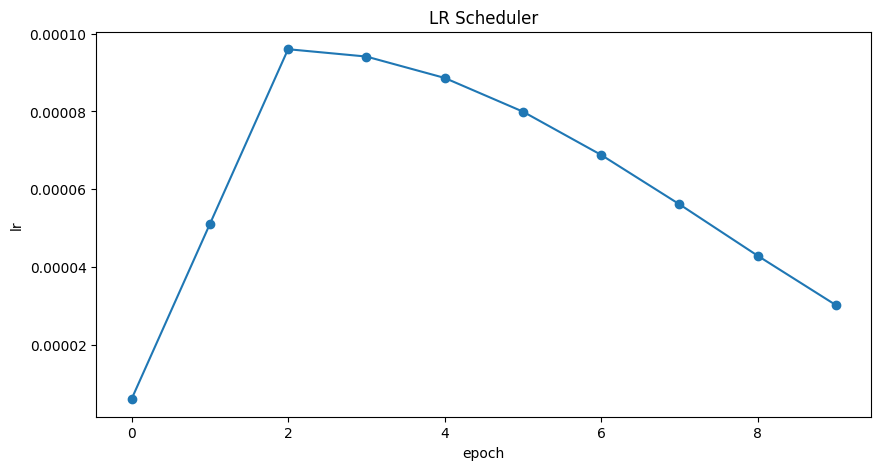

In [116]:
lr_cb = get_lr_callback(CFG.batch_size, plot=True)

In [117]:
val_data

<_PrefetchDataset element_spec=({'token_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'padding_mask': TensorSpec(shape=(None, 512), dtype=tf.bool, name=None)}, TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [118]:
history = model.fit(
    train_data,
    epochs=CFG.epochs,
    validation_data=val_data,
    callbacks=[lr_cb, checkpoint_callback]
)

Epoch 1/3


W0000 00:00:1716737156.212815     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


432/433 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - loss: 0.4866 - weighted_kappa: 0.1077

W0000 00:00:1716737588.024785     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 999ms/step - loss: 0.4863 - weighted_kappa: 0.1081
Epoch 1: saving model to /kaggle/working/model_checkpoint.weights.h5


W0000 00:00:1716737616.856509     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - loss: 0.4860 - weighted_kappa: 0.1085 - val_loss: 0.2296 - val_weighted_kappa: 0.6357 - learning_rate: 6.0000e-06
Epoch 2/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - loss: 0.1997 - weighted_kappa: 0.6604
Epoch 2: saving model to /kaggle/working/model_checkpoint.weights.h5
433/433 ━━━━━━━━━━━━━━━━━━━━ 378s 762ms/step - loss: 0.1996 - weighted_kappa: 0.6605 - val_loss: 0.1785 - val_weighted_kappa: 0.6862 - learning_rate: 5.1000e-05
Epoch 3/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - loss: 0.1640 - weighted_kappa: 0.7390
Epoch 3: saving model to /kaggle/working/model_checkpoint.weights.h5
433/433 ━━━━━━━━━━━━━━━━━━━━ 330s 762ms/step - loss: 0.1640 - weighted_kappa: 0.7390 - val_loss: 0.1564 - val_weighted_kappa: 0.7597 - learning_rate: 9.6000e-05


In [119]:
best_epoch = np.argmax(model.history.history['val_weighted_kappa'])
best_score = model.history.history['val_weighted_kappa'][best_epoch]
best_loss = model.history.history['val_loss'][best_epoch]

# Print and display best results
print(f'\n{"=" * 17} RESULTS {"=" * 17}')
print(f'>>>> BEST Loss  : {best_loss:.3f}\n>>>> BEST Score : {best_score:.3f}\n>>>> BEST Epoch : {best_epoch}')
print('=' * 50)


================= RESULTS =================
>>>> BEST Loss  : 0.156
>>>> BEST Score : 0.760
>>>> BEST Epoch : 2


In [120]:
test_df  = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv')

In [131]:
test_df

,essay_id,full_text
0,000d118,Many people have car where they live. The thin...
1,000fe60,I am a scientist at NASA that is discussing th...
2,001ab80,People always wish they had the same technolog...


In [122]:
test_essay_tensor = tf.constant(test_df['full_text'].values)

In [123]:
dataset = tf.data.Dataset.from_tensor_slices((test_essay_tensor,))

In [125]:
dataset = dataset.map(preprocess_fn,num_parallel_calls=tf.data.AUTOTUNE)

In [127]:
dataset = dataset.batch(CFG.batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [128]:
test_pred = model.predict(dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


W0000 00:00:1716738809.349839     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [132]:
test_pred

array([[9.9964392e-01, 9.3678981e-01, 4.9396461e-01, 3.7741356e-02,
        1.2370292e-03, 3.8501006e-04],
       [9.9983430e-01, 9.9399817e-01, 8.5885149e-01, 7.9025649e-02,
        1.0334861e-03, 2.3982447e-04],
       [9.9876571e-01, 9.9773610e-01, 9.9405956e-01, 9.2221504e-01,
        3.9723852e-01, 3.2722704e-02]], dtype=float32)

In [134]:
test_preds = np.sum((test_pred>0.5).astype(int), axis=-1)

In [136]:
test_preds = test_preds.clip(1,6)

array([2, 3, 4])

In [141]:
df = pd.DataFrame({'essay_id': test_df['essay_id'].values, 'score': test_preds})

# Define the file name for the CSV
csv_file = "submission.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file, index=False)

In [140]:
df

,essay_id,score
0,000d118,2
1,000fe60,3
2,001ab80,4
